**EDA (Exploratory Data Analysis)**


What is EDA?
- looking at data to understand what it is on a browsing level
- Performing investigation to understand data better
- Looking for anomalies and pattern hidden in data

Why EDA is important?
- Help us understand data before coming to conclusions
- Help with clarity before making assumptions
- Help spot erroneous data trends and events
- Backs up data with proof

`Importing Library`

In [5]:
# EXAMPLE IPL Datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

`Importing Datasets`

In [4]:
data=pd.read_csv("matches.csv")
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,5/4/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,6/4/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,7/4/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,8/4/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,8/4/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


`How big dataset? (row and column)`

In [6]:
data.shape

(636, 18)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

`Name of all the columns (labels)`

In [10]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

`Data Pre-processing: Finding out NaN values`

In [13]:
data.isna().any()

,0
id,False
season,False
city,True
date,False
team1,False
team2,False
toss_winner,False
toss_decision,False
result,False
dl_applied,False


`Statistical Description of dataset`

In [15]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


`How many match (total) were played according to dataset`

In [16]:
data['id'].count()

636

`How many IPL season are we using to analyze?`

In [18]:
data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

`Which IPL team won by scoring the maximum runs?`

In [20]:
data.iloc[data['win_by_runs'].idxmax()]

,43
id,44
season,2017
city,Delhi
date,6/5/2017
team1,Mumbai Indians
team2,Delhi Daredevils
toss_winner,Delhi Daredevils
toss_decision,field
result,normal
dl_applied,0


`Which IPL team won by consuming maximum wickets?`

In [21]:
data.iloc[data['win_by_wickets'].idxmax()]

,2
id,3
season,2017
city,Rajkot
date,7/4/2017
team1,Gujarat Lions
team2,Kolkata Knight Riders
toss_winner,Kolkata Knight Riders
toss_decision,field
result,normal
dl_applied,0


`Which IPL team won by consuming minimum wickets?`

In [22]:
data.iloc[data['win_by_wickets'].idxmin()]

,0
id,1
season,2017
city,Hyderabad
date,5/4/2017
team1,Sunrisers Hyderabad
team2,Royal Challengers Bangalore
toss_winner,Royal Challengers Bangalore
toss_decision,field
result,normal
dl_applied,0


`Which season consisted of the highest number of the matches ever played?`

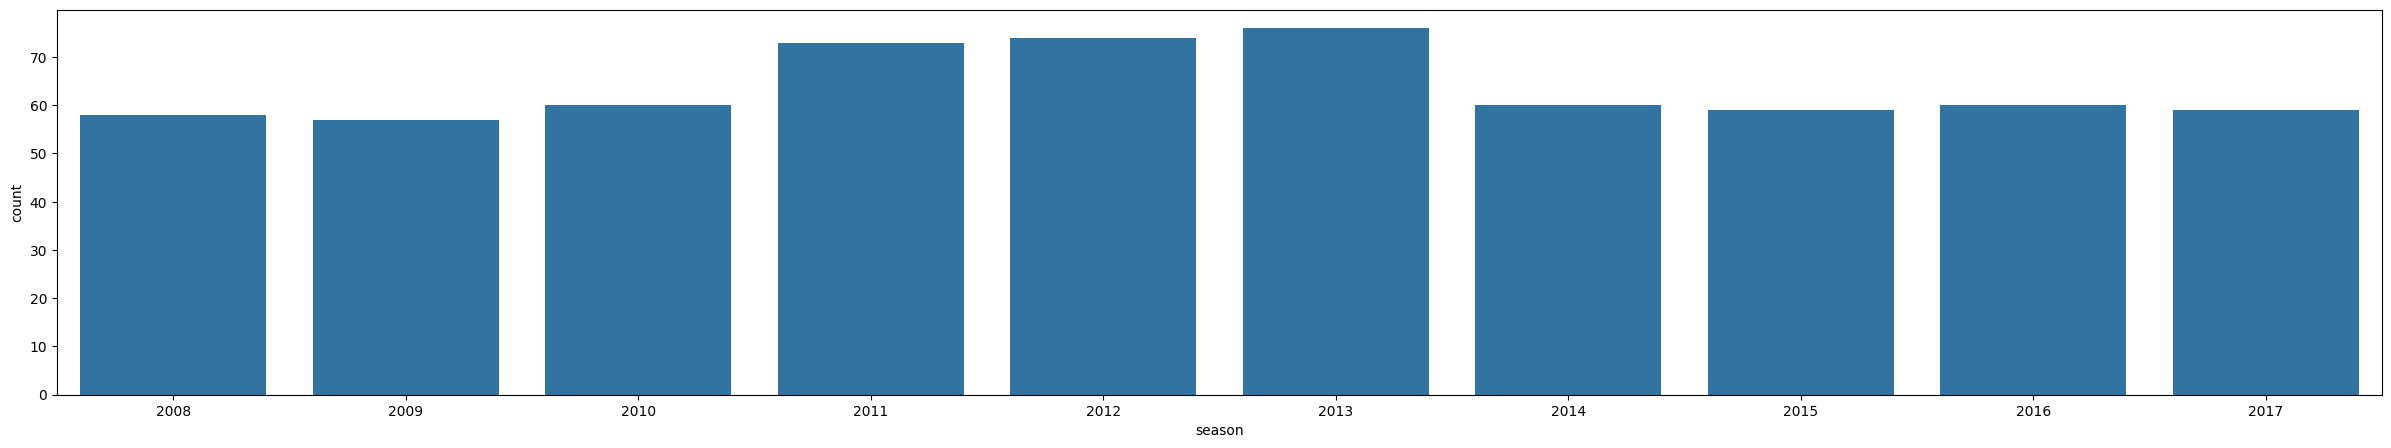

In [28]:
fig_dims = (30,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='season', ax=ax, data=data)
plt.show()

`Which is the most succesful IPL team with all the data at hand?`

<Axes: xlabel='count', ylabel='winner'>

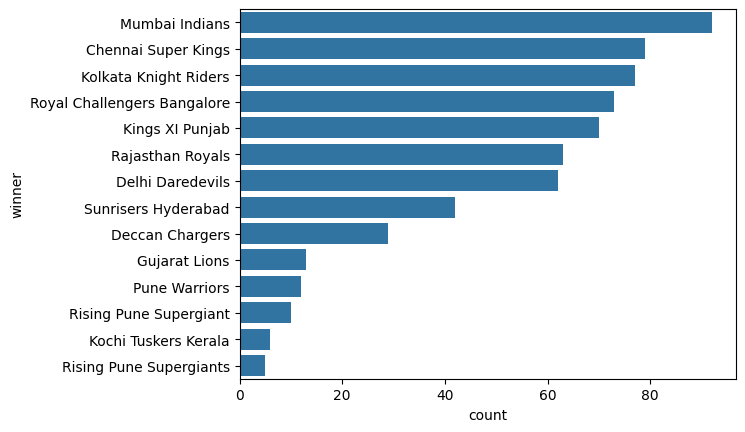

In [30]:
data1=data.winner.value_counts()
sns.barplot(y=data1.index, x=data1)

`What is probability of winning a match if the toss was won?`

In [35]:
probability_win = data['toss_winner'] == data['winner']
probability_win.groupby(probability_win).size()

,0
False,311
True,325


`Highest wins by teams per season`

In [42]:
data.groupby('season')['winner'].value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Mumbai Indians                  7
        Delhi Daredevils                7
                                       ..
2017    Sunrisers Hyderabad             8
        Kings XI Punjab                 7
        Delhi Daredevils                6
        Gujarat Lions                   4
        Royal Challengers Bangalore     3
Name: count, Length: 84, dtype: int64

`Toss decision`

In [43]:
data['toss_decision'].value_counts()

,count
toss_decision,
field,363
bat,273


`Man of the match - Highest to Lowest`

In [44]:
data['player_of_match'].value_counts()

,count
player_of_match,
CH Gayle,18
YK Pathan,16
DA Warner,15
AB de Villiers,15
RG Sharma,14
SK Raina,14
MS Dhoni,13
G Gambhir,13
AM Rahane,12


`Which city were the number of the matches played?`

In [45]:
data['city'].value_counts()

,count
city,
Mumbai,85
Bangalore,66
Kolkata,61
Delhi,60
Hyderabad,49
Chennai,48
Chandigarh,46
Jaipur,33
Pune,32
